# Homework 2

**Inhalt:** Datensets explorieren, filtern, Daten kombinieren

**Nötige Skills:** Erste Schritte mit Pandas, Daten explorieren und kombinieren

**Lernziele:**
- Review und Übung

# Das Beispiel

Einwohner der Stadt Zürich und ihre Herkunft. Wir sind interessiert an einer Auswertung, wo die Leute geboren sind, die in Zürich wohnen. Wie viele Menschen kommen aus welchen Gemeinden, Regionen, Ländern? Was sind das für Orte? Wie verändert sich die Population?

Open Data Set der Stadt Zürich.

Quelle: https://data.stadt-zuerich.ch/dataset/bev-bestand-jahr-gemeinde-land-geburtsort/resource/403b39e8-ecdc-410e-b0b3-7b689e17e046

Alle nötigen Files befinden sich im Unterordner `dataprojects/wherezurichborn`

## Vorbereitung

Importieren Sie die benötigten Libraries: pandas. Stellen Sie matplotlib so ein, dass die Charts irekt angezeigt werden.

In [5]:
import pandas as pd

In [6]:
%matplotlib inline

## Daten laden

Öffnen Sie das Datenfile fürs Jahr 2017: "2017_bev338od3380.csv"

In [53]:
path = 'dataprojects/wherezurichborn/2017_bev338od3380.csv'

In [54]:
df = pd.read_csv(path)

Zeigen Sie die obersten fünf Zeilen an

In [55]:
df.head()

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir
0,2017,679300.0,235700.0,1,Aeugst am Albis,8100,Schweiz,8
1,2017,676800.0,236800.0,2,Affoltern am Albis,8100,Schweiz,1171
2,2017,677800.0,241000.0,3,Bonstetten,8100,Schweiz,5
3,2017,682900.0,233100.0,4,Hausen am Albis,8100,Schweiz,16
4,2017,676400.0,239000.0,5,Hedingen,8100,Schweiz,6


Zeigen Sie die untersten fünf Zeilen an

In [56]:
df.tail()

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir
1760,2017,NaN,NaN,8995,Unbekannt,8615,Tuvalu,1
1761,2017,NaN,NaN,8995,Unbekannt,8621,Amerikanisch-Samoa,1
1762,2017,NaN,NaN,8995,Unbekannt,8654,Norfolkinsel,1
1763,2017,NaN,NaN,8995,Unbekannt,8671,Französisch-Polynesien,1
1764,2017,NaN,NaN,8995,Unbekannt,8995,Unbekannt,1011


Überlegen Sie sich: Was bedeuten die einzelnen Spalten? Welche Spalte enthält die wichtigen Infos?

In [57]:
# Wichtig sind:
#- die Spalte GebOrtSort (enthält die BFS-GemeindeNr)
#- GebOrtLang (den Gemeindenamen)
#- GebLandLang (das Land) und
#- AnzBestWir (wie viele Personen kommen von dort)

Checken Sie die Datentypen der Spalten.

In [58]:
df.dtypes

StichtagDatJahr      int64
xkoord             float64
ykoord             float64
GebOrtSort           int64
GebOrtLang          object
GebLandSort          int64
GebLandLang         object
AnzBestWir           int64
dtype: object

Sind die Daten sauber?

In [59]:
# Ja

Wie viele Einträge hat es insgesamt im Datensatz?

In [60]:
df.shape

(1765, 8)

## Einfache Auswertungen

Wie viele Einwohner sind im Total in der Statistik enthalten?

In [61]:
df['AnzBestWir'].sum()

423310

Sortieren Sie die Tabelle nach der Spalte "AnzBestWir". In welchen zehn Orten sind am meisten Zürcher Einwohner geboren?

In [62]:
df.sort_values("AnzBestWir", ascending=False).head(10)

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir
155,2017,683100.0,247100.0,261,Zürich,8100,Schweiz,124583
1564,2017,NaN,NaN,8995,Unbekannt,8207,Deutschland,35809
1591,2017,NaN,NaN,8995,Unbekannt,8248,Serbien,20387
1572,2017,NaN,NaN,8995,Unbekannt,8218,Italien,12342
109,2017,685800.0,243800.0,161,Zollikon,8100,Schweiz,7285
1581,2017,NaN,NaN,8995,Unbekannt,8231,Portugal,6551
1586,2017,NaN,NaN,8995,Unbekannt,8239,Türkei,5585
188,2017,600100.0,199700.0,351,Bern,8100,Schweiz,5558
1579,2017,NaN,NaN,8995,Unbekannt,8229,Österreich,5516
733,2017,611300.0,267600.0,2701,Basel,8100,Schweiz,5422


Nun sind wir nur an den Schweizer Gemeinden interessiert - das Ausland lassen wir vorerst weg. Erstellen Sie nochmals eine Top10-Liste.

In [63]:
df[df['GebLandSort'] == 8100].sort_values('AnzBestWir', ascending=False).head(10)

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir
155,2017,683100.0,247100.0,261,Zürich,8100,Schweiz,124583
109,2017,685800.0,243800.0,161,Zollikon,8100,Schweiz,7285
188,2017,600100.0,199700.0,351,Bern,8100,Schweiz,5558
733,2017,611300.0,267600.0,2701,Basel,8100,Schweiz,5422
142,2017,697200.0,261700.0,230,Winterthur,8100,Schweiz,5271
844,2017,746200.0,254600.0,3203,St. Gallen,8100,Schweiz,4618
446,2017,666200.0,211800.0,1061,Luzern,8100,Schweiz,4326
150,2017,676200.0,250000.0,247,Schlieren,8100,Schweiz,4039
125,2017,696700.0,245000.0,198,Uster,8100,Schweiz,3509
91,2017,683400.0,241300.0,135,Kilchberg (ZH),8100,Schweiz,3343


Aus welchen Ländern (ausserhalb der Schweiz) kommen die meisten Zürcher Einwohner? Top 10 Liste.

In [64]:
df[df['GebLandSort'] != 8100].sort_values('AnzBestWir', ascending=False).head(10)

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir
1564,2017,NaN,NaN,8995,Unbekannt,8207,Deutschland,35809
1591,2017,NaN,NaN,8995,Unbekannt,8248,Serbien,20387
1572,2017,NaN,NaN,8995,Unbekannt,8218,Italien,12342
1581,2017,NaN,NaN,8995,Unbekannt,8231,Portugal,6551
1586,2017,NaN,NaN,8995,Unbekannt,8239,Türkei,5585
1579,2017,NaN,NaN,8995,Unbekannt,8229,Österreich,5516
1585,2017,NaN,NaN,8995,Unbekannt,8236,Spanien,5101
1566,2017,NaN,NaN,8995,Unbekannt,8212,Frankreich,4754
1602,2017,NaN,NaN,8995,Unbekannt,8264,Russland,4422
1695,2017,NaN,NaN,8995,Unbekannt,8439,USA,4165


**Plot:** Die zehn wichtigsten Herkunftsländer von Personen in Zürich. Barchart horizontal bietet sich an.

Tipp: `plot(x=...., y=....)` benutzen. Und gerne mit einem Titel (gilt für alle Plots ab jetzt)!

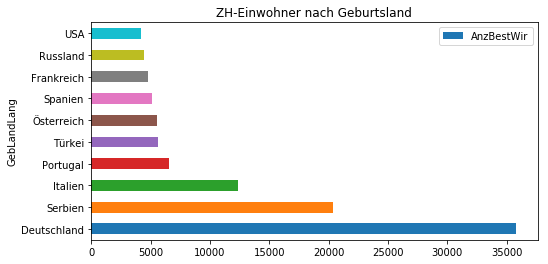

In [65]:
my_title = "ZH-Einwohner nach Geburtsland"
df[df['GebLandSort'] != 8100].sort_values('AnzBestWir', ascending=False).head(10).plot(kind='barh', x='GebLandLang', y='AnzBestWir', figsize=(8,4), title=my_title)

**Plot:** Ein Histogramm, das die Verteilung der Anzahl Personen über alle Geburtsorte anzeigt.

Text(0.5,1,'Histogramm der Gemeinden nach ZH-Einwohnerzahl')

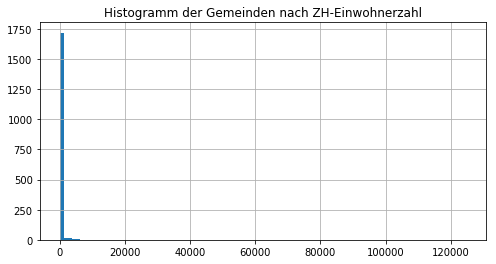

In [66]:
my_title = "Histogramm der Gemeinden nach ZH-Einwohnerzahl"
fig = df['AnzBestWir'].hist(bins=100, figsize=(8,4))
fig.set_title(my_title)

**Plot :** Ein Histogramm mit derselben Verteilung – nur für Einwohner, die aus der Schweiz stammen, aber nicht in Zürich geboren sind.

Text(0.5,1,'Histogramm der Gemeinden nach ZH-Einwohnerzahl')

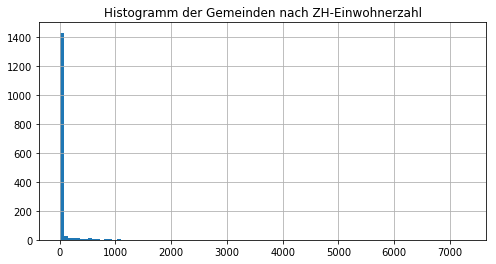

In [67]:
my_title = "Histogramm der Gemeinden nach ZH-Einwohnerzahl"
fig = df[(df['GebLandSort'] == 8100) & (df['GebOrtLang'] != 'Zürich')]['AnzBestWir'].hist(bins=100, figsize=(8,4))
fig.set_title(my_title)

Erkennt man aus diesem Chart irgendetwas interessantes?

In [68]:
# Geht so. Es gibt sehr viele Gemeinden, aus denen wenig Leute kommen. 
# Und sehr wenig Gemeinden, aus denen viele Leute kommen.


Erstellen Sie einen weiteren Plot - der die Verteilung dieser Personen nochmals anders zeigt.

Reihen Sie die Gemeinden auf der x-Achse nach Personenzahl auf, bilden Sie auf der y-Achse die Anzahl Personen ab.

Tipp: `.reset_index()` benutzen, um die Gemeinden nach dem Sortieren aufzureihen.

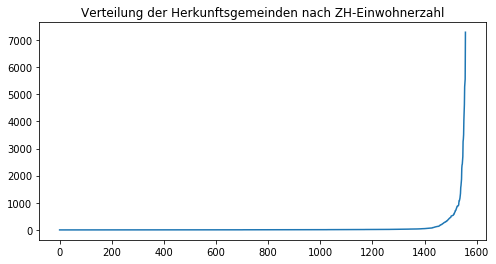

In [69]:
my_title = "Verteilung der Herkunftsgemeinden nach ZH-Einwohnerzahl"
df[(df['GebLandSort'] == 8100) & (df['GebOrtLang'] != 'Zürich')].sort_values('AnzBestWir').reset_index()['AnzBestWir'].plot(figsize=(8,4), title=my_title)

## Neue Spalte erstellen

Die x- und y-Koordinaten der Gemeinden sind im System der Schweizer Landeskoordinaten angegeben: https://de.scoutwiki.org/Schweizer_Landeskoordinaten. Eine Einheit darauf entspricht einem Meter.

Ein Ort mit den x/y-Koordinaten (000000 / 000000) ist also zB 20 Meter entfernt von einem anderen Ort mit den Koordinaten (000000 / 0000*20*).

Die Koordinaten von Zürich sind: (683100.0 / 247100.0).

Erstellen Sie eine neue Spalte mit dem Namen "Distanz", welche die Distanz einer Ortschaft zu Zürich enthält.

Tipp: Pythagoras anwenden ;-) https://www.sofatutor.ch/mathematik/geometrie/berechnungen-an-dreiecken/satz-des-pythagoras

In [70]:
df['Distanz'] = ((df['xkoord'] - 683100)**2 + (df['ykoord'] - 247100)**2)**0.5

Checken Sie anhand der ersten zwei Zeilen, ob die Berechnung funktioniert hat.

In [72]:
df.head(2)

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir,Distanz
0,2017,679300.0,235700.0,1,Aeugst am Albis,8100,Schweiz,8,12016.655109
1,2017,676800.0,236800.0,2,Affoltern am Albis,8100,Schweiz,1171,12073.938877


Checken Sie, dass die Spalte "Distanz" in Zürich gleich null ist.

In [73]:
df[df['GebOrtLang'] == 'Zürich']

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir,Distanz
155,2017,683100.0,247100.0,261,Zürich,8100,Schweiz,124583,0.0


**Plots:**

Erstellen Sie einen Scatterplot: Alle Orte ausser Zürich.

Auf der x-Achse: die Distanz von Zürich. Auf der y-Achse: die Anzahl Personen.

In [52]:
my_title = "ZH-Einwohner nach Distanz des Herkunftsorts"
df[df['GebOrtLang'] != 'Zürich'].plot(kind='scatter', x='Distanz', y='AnzBestWir', figsize=(8,4), title=my_title)


ValueError: scatter requires x column to be numeric

Gibt es einen Zusammenhang?

In [ ]:
# In Worten

Wir können versuchen, den obigen Chart noch etwas besser hinzukriegen. Und zwar so:

## Numerische Wert kategorisieren

Unsere Distanz-Spalte ist momentan ein Kontinuum: Wir haben für jede Spalte einen exakten Wert.

Nun wollen wir diese Werte in Töpfe reinschmeissen: Zum Bespiel: 0 bis 10'000 Personen, 10'000 bis 20'000 Personen, etc.

**Variante 1:** Wir runden einfach auf den nächsten Zehntausender.

Erstellen Sie eine neue Spalte: "Distanz_gerundet".

Benutzen Sie dazu die Funktion `.round()` (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.round.html)

Checken Sie anhan der ersten zwei Zeilen ab, ob es funktioniert hat:

Erstellen Sie nun einen ähnlichen Plot wie zuvor - nicht als Scatter, sondern als Barchart.

Wir wollen wissen: Wie viele Personen kommen jeweils insgesamt aus den Orten, die innerhalb eines bestimmten Radius zu Zürich liegen?

Vorgehen:

1. Gruppieren nach gerundeter Distanz

1. Anzahl Personen summieren

1. Plot, Barchart

Gibt es einen Zusammenhang?

In [ ]:
# In Worten

**Variante 2 (Bonus):** Wir benutzen eine spezielle Kategorisierungsfunktion.

Und zwar: pd.cut() - (https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)

Diese Funktion "schneidet" unsere Distanz-Spalte in so viele gleich lange Stücke ("bins"), wie wir wollen.

Zum Beispiel: in 50 Stücke. Und sie spuckt gleich zu jedem Eintrag aus, in welches Stück er gehört.

In [ ]:
# pd.cut(df['Distanz'], bins=50)

Wir müssen die Funktion jetzt anwenden (kreieren Sie die Spalte "Distanz_Kategorie")

Check, erste zwei Zeilen. Das sieht dann so aus: wir erhalten ein Intervall, mit oberer und unterer Grenze.

Wir können nun den analogen Plot wie bei Variante 1 erstellen:

1. Gruppieren nach kategorisierter Distanz

1. Anzahl Personen summieren

1. Plot, Barchart

Inwiefern unterscheidet sich dieser Plot von dem vorherigen?

In [ ]:
# In Worten

## Daten kombinieren

Falls Sie im letzten Abschnitt abgehängt haben: egal. Hier kommt was neues.

Wir haben in unserem Datenornder diverse Hilfsdateien:
- Gemeinden_Kantone.xlsx
- Kantone_IDs.csv

Wir können diese Dateien benutzen, um weitere Auswertungen zu machen.

Laden Sie das File "Gemeinden_Kantone.xlsx" und speichern Sie es als Dataframe mit dem Namen `df_gem`

Checken Sie die ersten fünf Spalten.

Welche Art von Informationen enthält die Datei?

In [ ]:
# In Worten

Fügen Sie die Informationen aus `df_gem` in die Haupttabelle ein. Nennen Sie die kombinierte Tabelle `df2`.

Und zwar so, dass die Ortschaften, zu denen es keinen passenden Eintrag in der Hilfstabelle gibt, erhalten bleiben.

Tipp: `df.merge()` benutzen.

Check anhand von zwei Zeilen: hat es funktioniert?

Die Spalte mit dem Gemeindenamen haben wir nun zweimal! Schmeissen Sie den zweiten Eintrag raus. Schmeissen Sie gleichzeitig auch die importierte Gemeinde-Nummer raus, die haben wir ebenfalls zweimal (Ordnung muss sein!). Check anhand von zwei Zeilen.

Laden Sie nun noch das File "Kantone_IDs.csv" und fügen die Infos in die Haupttabelle ein.

Vorgehen: Analog wie gerade eben.
- Datei laden
- Tabellen mergen
- Überflüssige Spalten rauswerfen

Speichern Sie die kombinierte Tabelle unter dem Namen `df3`

In welchen zehn Kantonen wurden die meisten Einwohner der Stadt Zürich geboren? Liste ...

... und **Plot:** die Top 2 bis 9 (also Zürich nicht), Barchart horizontal.

## Daten kombinieren 2

Wir haben auch noch ein File, das die Einwohnerzahl jeder Gemeinde angibt:
- Gemeinde_Einwohner.xlsx

Laden Sie die Datei und fügen Sie die wesentlichen Infos daraus in unsere Haupttabelle ein (`df3` -> `df4`)

**Scatterplot :** Gemeindegrösse vs Anzahl Personen in Zürich. Alle Gemeinden ausser Zürich.

Erkennt man daraus einen Zusammenhang?

In [ ]:
# In Worten

Bringt es etwas, wenn wir die Einwohnerdaten klassifizieren, analog zu oben mit den Distanzen?

Vielleicht mit dieser Funktion hier? https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html

Probieren Sie es aus.

## Vergleich 2016

Wir sind fast fertig! Das letzte File im Directory heisst:
- 2016_bev338od3380.csv

Es ist dieselbe Datenbank, einfach mit den Vorjahreswerten.

Zeitvergleiche sind immer gut, um eine Story zu generieren. Schauen wir mal, was rauskommt.

Lesen Sie die Datei ein und geben Sie ihr den Namen `dfx`

Alle Spalten löschen bis auf "GebOrtSort" und "AnzBestWir"

Fügen Sie die Vorjahreswerte zu unserer Datenbank df5 hinzu.

Ein bisschen Spalten-Renaming würde Sinn machen, zB die beiden Spalten 'AnzBestWir' mit den Jahreszahlen 2016 und 2017 beschriften

Check:

Erstellen Sie eine neue Spalte mit dem Namen "Zunahme". Inhalt: Differenz der beiden Jahreswerte.

Aus welchen zehn Schweizer Ortschaften hat die Zürcher Bevölkerung am meisten zugenommen? Liste.

... und **Plot**, am besten Bar horizontal.

Aus welchen zehn Kantonen hat die Zürcher Bevölkerung am meisten zugenommen? Liste ...

... und **Plot**. Wir haben eine Headline: *"Masseneinwanderung aus dem Kanton XX nach Zürich!"*

**Plot** zu den zehn Kantonen, aus denen die ZH-Bevölkerung am meisten zurückgeht. Headline?

## Bonus: Geoplotting

Ab hier können Sie sich zurücklehnen - es ist nur noch klicken angesagt.

Wir plotten zum Spass noch auf einer Karte, woher die Zürcher Bevölkerung stammt.

Funktioniert allerdings nur, wenn bis jetzt das meiste einigermassen richtig gelöst wurde!

### Libraries

In [ ]:
import geopandas as gpd

In [ ]:
from shapely.geometry import Point

In [ ]:
import matplotlib.pyplot as plt

### Shapefiles
Dieselben, die wir bereits bei den Immobilien benutzt haben

In [ ]:
gdf_ch = gpd.read_file('dataprojects/immobilienboom/shp/g1l17.shp')
gdf_ch.head(2)

In [ ]:
gdf_gemeinden = gpd.read_file('dataprojects/immobilienboom/shp/g1g17.shp')
gdf_gemeinden.head(2)

In [ ]:
gdf_lakes = gpd.read_file('dataprojects/immobilienboom/shp/g1s17.shp')
gdf_lakes.head(2)

### Informationen aus unserem Dataframe ins Shapefile

In [ ]:
gdf_gemeinden_m = gdf_gemeinden.merge(df5, how="inner", left_on="GMDNR", right_on="GebOrtSort")

In [ ]:
gdf_gemeinden_m.head(2)

Und die Geometrie auf "Point" anpassen

In [ ]:
gdf_gemeinden_m['point_geometry'] = gdf_gemeinden_m.apply(lambda row: Point(row.X_CNTR, row.Y_CNTR), axis=1)

In [ ]:
gdf_gemeinden_m = gdf_gemeinden_m.set_geometry('point_geometry')

Ein paar Vorbereitungen für den Plot

In [ ]:
title_font = {
    'family': 'sans-serif',
    'color':  'black',
    'weight': 'bold',
    'size': 20
}

In [ ]:
gdf_gemeinden_m['markersize'] = (gdf_gemeinden_m['Einwohner'] ** 0.5) / 1.5
gdf_gemeinden_m['markersize_17'] = (gdf_gemeinden_m['2017'] ** 0.5) / 1.5

### Plot

**Variante 1:** Herkunft fürs Jahr 2017 nach Gemeinde

In [ ]:
# Code für die Landesgrenzen und die Seen
ax = gdf_ch.plot(edgecolor='grey', color='#EEEEEE', alpha=1, linewidth=2, figsize=(20,13))
gdf_lakes.plot(edgecolor='grey', facecolor='lightblue', alpha=1, linewidth=1, ax=ax)

# Für jede Gemeinde einen Punkt - Herkunft 2017
gdf_gemeinden_m.plot(markersize=gdf_gemeinden_m['markersize_17'], color='darkblue', alpha=0.7, linewidth=0.5, legend=True, ax=ax)

my_title = "Geburtsorte der Zürcher Bevölkerung"
plt.text(480000, 312000, my_title, fontdict=title_font)

ax.axis('off')

**Variante 2:** Wir zeichnen auch noch die Grösse der Gemeinde auf

In [ ]:
# Code für die Landesgrenzen und die Seen
ax = gdf_ch.plot(edgecolor='grey', color='#EEEEEE', alpha=1, linewidth=2, figsize=(20,13))
gdf_lakes.plot(edgecolor='grey', facecolor='lightblue', alpha=1, linewidth=1, ax=ax)

# Für jede Gemeinde einen Kreis - Einwohnerzahl
gdf_gemeinden_m.plot(markersize=gdf_gemeinden_m['markersize'], edgecolor='grey', color='#EEEEEE', alpha=0.7, linewidth=0.5, legend=True, ax=ax)
# Für jede Gemeinde einen Punkt - Herkunft 2017
gdf_gemeinden_m.plot(markersize=gdf_gemeinden_m['markersize_17'], color='darkblue', alpha=0.7, linewidth=0.5, legend=True, ax=ax)

my_title = "Geburtsorte der Zürcher Bevölkerung"
plt.text(480000, 312000, my_title, fontdict=title_font)

ax.axis('off')

 **Variante 3:** Farbliche Codierung der Zuwanderung 2016-2017 

In [ ]:
# Code für die Landesgrenzen und die Seen
ax = gdf_ch.plot(edgecolor='grey', color='#EEEEEE', alpha=1, linewidth=2, figsize=(20,13))
gdf_lakes.plot(edgecolor='grey', facecolor='lightblue', alpha=1, linewidth=1, ax=ax)

# Für jede Gemeinde einen Punkt - Herkunft 2017 - Farbe gemäss Spalte "Zunahme"
gdf_gemeinden_m.plot(markersize=gdf_gemeinden_m['markersize_17'], column='Zunahme', scheme='quantiles', k=15, cmap='RdYlGn', alpha=0.7, linewidth=0.5, legend=True, ax=ax)

my_title = "Geburtsorte der Zürcher Bevölkerung"
plt.text(480000, 312000, my_title, fontdict=title_font)

ax.axis('off')